In [ ]:
# importing tensorflow and keras library

import tensorflow as tf
from tensorflow import keras # it is the part of tensorflow

In [166]:
# check tensorflow version
print(tf.__version__)

2.0.0-rc0


In [167]:
# import required librarie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
# import mnist dataset directly from keras dataset

mnist = keras.datasets.fashion_mnist

In [169]:
type(mnist) # it is downloaded from module_wrapper.TFModuleWrapper

# it gives TFModuleWrapper object

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [170]:
# load the data into real jupyter notebook
# it will contain two tupe 1st tuple for training and 2nd tuple for testing data

(x_train,y_train), (x_test,y_test )=mnist.load_data()

In [171]:
# lets ckeck training data shape

x_train.shape

# 60000 --> datarows
# 28,28 --> metrics size

(60000, 28, 28)

In [172]:
y_train.shape

# 1D array

(60000,)

In [173]:
# it will contain all grey scale value which is in range between 0-255

print(x_train.max())
print(x_train.min())

255
0


In [174]:
x_train.mean()

72.94035223214286

In [175]:
# this 6000 images are classified into 10 different labels and 
# this label encoded into numerical value 
# this values are between 0-9

y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot

In [176]:
class_names = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

# Data Exploration

In [177]:
x_train.shape


(60000, 28, 28)

In [178]:
x_test.shape

(10000, 28, 28)

In [179]:
# x_train[2]

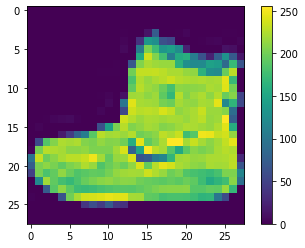

In [180]:
# visualize the data

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

# here we see that bar value range is from 0-250 but nueral network model 
# never take value between more than 0-1

In [181]:
# how we may know which image is this? 

y_train

# we check that at 0th position in y_train data it is number 9 --> boot in our class

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [182]:
# we devide the value of x_train by 255 
# because the it only consider the value between 0-1

x_train = x_train/255.0

In [183]:

# same way we do it for testing data

x_test = x_test/255.0

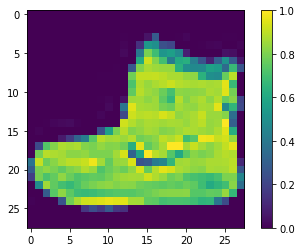

In [184]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

# we see that value of bar range is change from 0-250 to 0-1
# hence it is fit into nural netwrok

## Build a model with TF 2.0

In [185]:
# layer take data and store it into hidden layer and so on and finally op

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Flatten --> use as a first layed=r

In [203]:
# array define how many layer we require in out model

model = Sequential()
model.add(Flatten(input_shape = (28,28))) # Flatten transform the format of data into 1D
# model.add(Dense(128,activation = 'relu'))
# 128 --> neurons
# there are many activation funation

model.add(Dense(10,activation = 'softmax'))
# 10 output layer

In [204]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# model compilation
 - loss function --> defines measure how accurate the model in training and testing
 - optimizer 
 - metrics

In [205]:
# Role of an optimizer
# Optimizers update the weight parameters to minimize the loss function. Loss function acts as 
# guides to the terrain telling optimizer 
# if it is moving in the right direction to reach the bottom of the valley, the global minimum

# # Adam [1] is an adaptive learning rate optimization algorithm that's been designed specifically 
# for training deep neural networks. ... 
# # The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter




In [213]:
# When using the sparse_categorical_crossentropy loss, your targets should be integer targets.
# If you have categorical targets, you should use categorical_crossentropy

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [214]:
y_train.shape


(60000,)

In [215]:
# epochs defines the number of time train the model 
# here we define 10 mean our model continuously train 10 time again and again untill 10
# if we not define epoch it will train only 1 time

# batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32. 
# Do not specify the batch_size if your data is in the form of symbolic tensors, generators,
# or Sequence instances (since they generate batches
# validation_split --> from all x_train data 20% data use for validation

history = model.fit(x_train,y_train,epochs=10,batch_size=10,validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 374us/sample - loss: 0.3910 - accuracy: 0.8635 - val_loss: 0.4188 - val_accuracy: 0.8562
Epoch 2/10
48000/48000 [==============================] - 16s 333us/sample - loss: 0.3906 - accuracy: 0.8623 - val_loss: 0.4284 - val_accuracy: 0.8564
Epoch 3/10
48000/48000 [==============================] - 16s 341us/sample - loss: 0.3879 - accuracy: 0.8646 - val_loss: 0.4314 - val_accuracy: 0.8537
Epoch 4/10
48000/48000 [==============================] - 19s 389us/sample - loss: 0.3866 - accuracy: 0.8638 - val_loss: 0.4294 - val_accuracy: 0.8548
Epoch 5/10
48000/48000 [==============================] - 19s 392us/sample - loss: 0.3844 - accuracy: 0.8653 - val_loss: 0.4286 - val_accuracy: 0.8547
Epoch 6/10
48000/48000 [==============================] - 19s 392us/sample - loss: 0.3824 - accuracy: 0.8655 - val_loss: 0.5182 - val_accuracy: 0.8375
Epoch 7/10
48000/48000 [====================

In [217]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.46741983036994933, 0.8419]

In [218]:
# it is overfitting bcoz training acuarcy = 0.88 and testing accu = 0.88

In [219]:
# prediction with sklearn

from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(x_test)

accuracy_score(y_test,y_pred)

0.8419

In [220]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [221]:
pred = model.predict_classes(x_test)
pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [1]:
# actual 
y_test[0]

NameError: name 'y_test' is not defined

In [223]:
# prediction
pred[0]

0

# Plotting Learning curve and confusion matrix in tf 2.0

In [224]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [225]:
# where our first history contains the all data of loss and accuarcy 
# mean our fitted data is stored into history variable 
# and second history show tha all loss values

history.history

{'loss': [0.39095170159246967,
  0.3905976141184025,
  0.3878568120370619,
  0.38664486377791035,
  0.38440098714248355,
  0.38239583169760105,
  0.38185874864871344,
  0.381315722988802,
  0.3788335757439684,
  0.37715033546090126],
 'accuracy': [0.86345834,
  0.8622917,
  0.8645625,
  0.86379164,
  0.86527085,
  0.8655,
  0.86529166,
  0.86658335,
  0.8668333,
  0.86802083],
 'val_loss': [0.41876231983226414,
  0.4283866125760445,
  0.4314001048647333,
  0.4293651083755928,
  0.4286432053738584,
  0.5181637946888804,
  0.448638488658083,
  0.4390104819221112,
  0.4227941193784742,
  0.434625042079327],
 'val_accuracy': [0.85616666,
  0.85641664,
  0.85366666,
  0.8548333,
  0.85466665,
  0.8375,
  0.84375,
  0.85175,
  0.85391665,
  0.85408336]}

In [226]:
import matplotlib.pyplot as plt

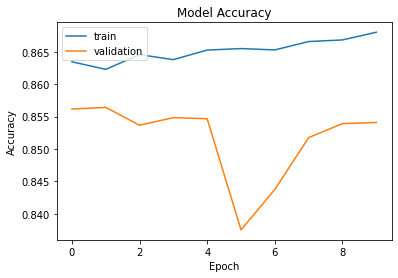

In [232]:
# plot training and validation accuarcy value

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

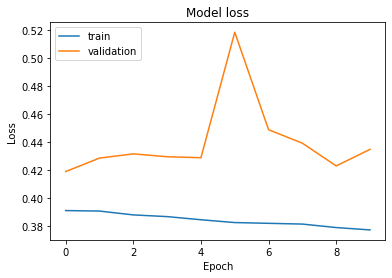

In [233]:
# plot training and validation Loss value

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# plot confusion matrix

In [247]:
# if you dont have mlxtend then install it 
# !pip install mlxtend

from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3fb67d5708>)

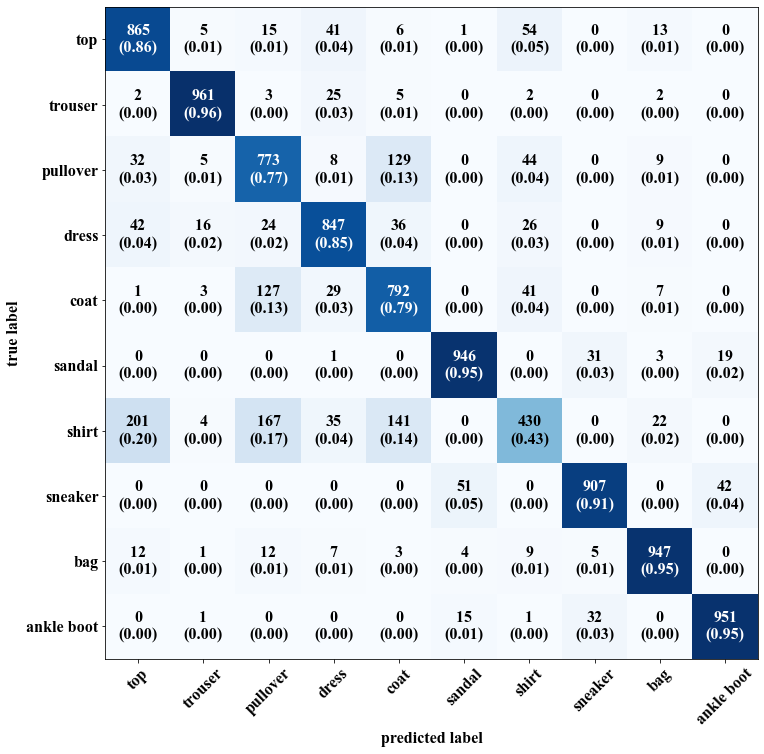

In [254]:
mat = confusion_matrix(y_test,y_pred)

# change font size and etc
font = {
    'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' :16
}

# matplotlib.rc('font',dict_argument)
matplotlib.rc('font',**font)

plot_confusion_matrix(conf_mat=mat,figsize=(12,12),class_names=class_names,show_normed=True)

# show_normed=True --> print probability of accuracy matrix 
# class_names=class_names --> to show class_name at x -axis


In [243]:
# lets look at first column
# from above matrix it define top is predicted true value = 865 time , 
# trouser predict 2 time as top 
# pullover prdict 32 time as top

# and so on...